### GRIP : The Sparks Foundation

### Data Science and Business Analytics Intern

### Author : Pratik Chouhan

#### Task 2 : Prediction Using Unsupervised Machine Learning (K- Means Clustering)- Iris Dataset

Dataset - https://bit.ly/3kXTdox

### 1. Import Libraries

In [4]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2. Importing Dataset

In [5]:
iris_df = pd.read_csv('iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 3. Exploring Data


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# check unique names of species
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
How do you find the optimum number of clusters for K Means? How does one determine the value of K?

Object `K` not found.


In [ ]:
How do you find the optimum number of clusters for K Means? How does one determine the value of K

In [9]:
# Dividing data into Independent and Dependent features

x= iris_df.iloc[:, [1, 4]].values

## Elbow Method
In this method the number of clusters are varies within a certain range. For each number within cluser sum of square(wss) value is calculated and stored in a list.These value are then plotted against the range of numbers of clusters used before. The location of bend in the 2d plot indicates the appropriate number of clusters.

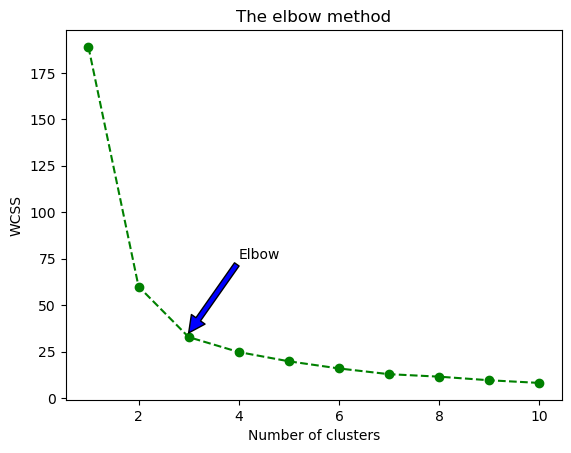

In [11]:
# Using the elbow method to find the optimum number of clusters

from sklearn.cluster import KMeans
wcss =[]                                                    ## Within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss, "go--")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.annotate('Elbow', xytext = (4,75), xy =(3, 35), arrowprops = {"facecolor" : "blue"})
plt.show()

### By the help of 'The Elbow Method' from the above graph, the optimum cluster is where the elbow occures. This is This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters is "3".

### 4. Training the KMeans model on the Dataset

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 100)
y_kmeans = kmeans.fit_predict(x)

In [15]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 2 0 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]


### 5. Visualising the clusters - On the first two columns

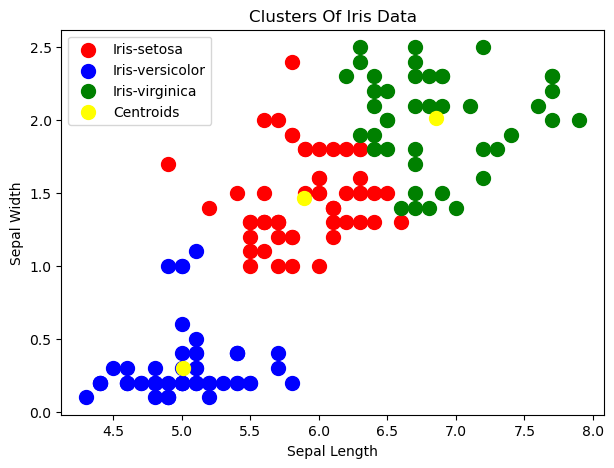

In [18]:
plt.figure(figsize=(7,5))
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans ==0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans ==1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans ==2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c = 'yellow', label = 'Centroids')
plt.title('Clusters Of Iris Data')
plt.xlabel('Sepal Length', fontsize = 10)
plt.ylabel('Sepal Width', fontsize = 10)
plt.legend()
plt.show()

### Thus, we have predicted the number of clusters and represented it visually.